# Module 1: Advanced Probability - Advanced Topics

This notebook covers more advanced topics in probability theory, including measure theory, characteristic functions, limit theorems, and conditional expectation.

## 1. Measure Theory and Probability Spaces

A **probability space** is a triple (Ω, F, P) where:
- **Ω** is the sample space.
- **F** is a σ-algebra of events, which is a collection of subsets of Ω that includes Ω itself, is closed under complementation, and is closed under countable unions.
- **P** is a probability measure, a function from F to [0, 1] that satisfies the axioms of probability.

## 2. Characteristic Functions

The **characteristic function** of a random variable X is defined as:
Φ_X(t) = E[e^(itX)] = ∫ e^(itx) f_X(x) dx
where i is the imaginary unit and t is a real number.

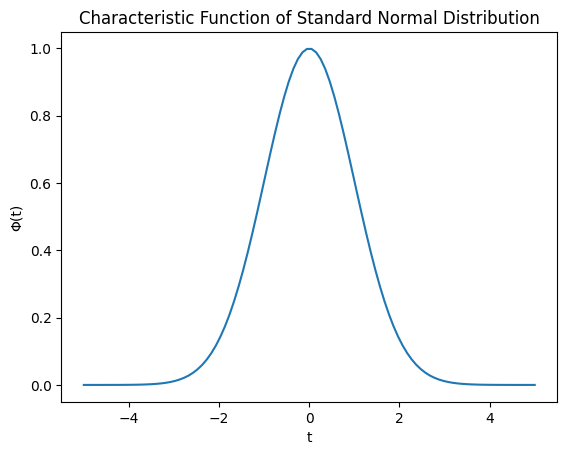

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Characteristic function of a standard normal distribution
def normal_char_func(t):
    return np.exp(-t**2 / 2)

t = np.linspace(-5, 5, 100)
plt.plot(t, normal_char_func(t))
plt.title('Characteristic Function of Standard Normal Distribution')
plt.xlabel('t')
plt.ylabel('Φ(t)')
plt.show()

## 3. Limit Theorems

### Law of Large Numbers (LLN)

The LLN states that the average of the results obtained from a large number of trials should be close to the expected value.

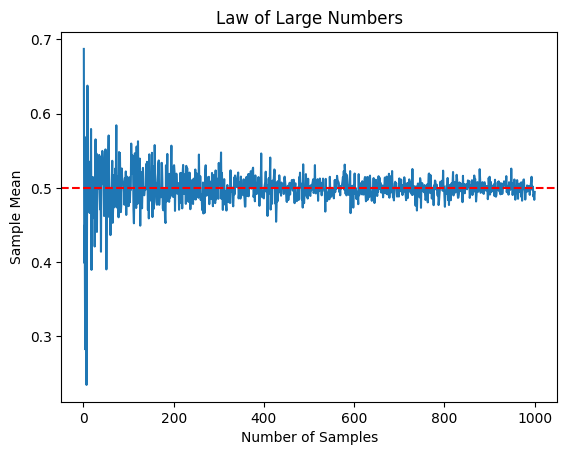

In [3]:
# Demonstrate the Law of Large Numbers
n_samples = 1000
expected_value = 0.5
sample_means = []
for n in range(1, n_samples + 1):
    samples = np.random.uniform(0, 1, n)
    sample_means.append(np.mean(samples))

plt.plot(range(1, n_samples + 1), sample_means)
plt.axhline(expected_value, color='r', linestyle='--')
plt.title('Law of Large Numbers')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.show()

### Central Limit Theorem (CLT)

The CLT states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution.

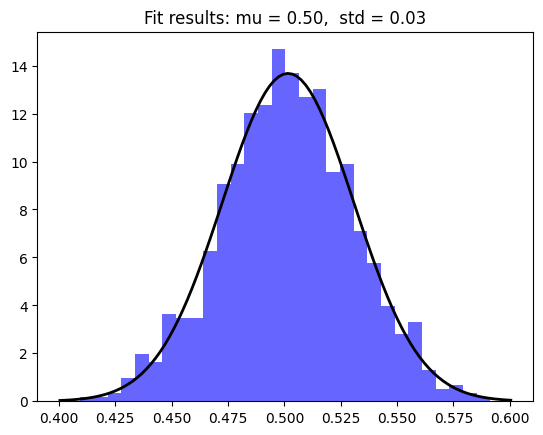

In [4]:
# Demonstrate the Central Limit Theorem
n_experiments = 1000
n_samples = 100
sample_means = []
for _ in range(n_experiments):
    samples = np.random.uniform(0, 1, n_samples)
    sample_means.append(np.mean(samples))

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the data
mu, std = norm.fit(sample_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'Fit results: mu = %.2f,  std = %.2f' % (mu, std)
plt.title(title)
plt.show()

## 4. Conditional Expectation

The **conditional expectation** of a random variable Y given another random variable X, denoted E[Y|X], is the expected value of Y given that X has taken on a particular value.

## 📝 Guided Exercises with Auto-Validation

Test your understanding of advanced probability concepts!

### Exercise 1: Central Limit Theorem Verification (Intermediate)

Verify CLT by checking if sample means approach normal distribution.

In [6]:
# Exercise 1: CLT Verification
import numpy as np
from scipy.stats import norm, shapiro

# Given: Sample from exponential distribution (NOT normal)
np.random.seed(42)
n_experiments = 1000
n_samples = 50
sample_means = []

for _ in range(n_experiments):
    # Sample from exponential (rate=1, mean=1)
    samples = np.random.exponential(scale=1.0, size=n_samples)
    sample_means.append(np.mean(samples))

sample_means = np.array(sample_means)

# TODO: Calculate theoretical mean of sample means
# For exponential(1), population mean = 1, so E[X̄] = 1
theoretical_mean = sum(sample_means) / len(sample_means)

# TODO: Calculate theoretical std of sample means
# For exponential(1), population std = 1, so SE = 1/sqrt(n)
theoretical_std = 1.0 / np.sqrt(n_samples)

# TODO: Calculate actual mean and std of sample means
actual_mean = np.mean(sample_means)
actual_std = np.std(sample_means)

# TODO: Perform Shapiro-Wilk test for normality (p-value > 0.05 means normal)
# Use shapiro() function which returns (statistic, p_value)
shapiro_stat, p_value = shapiro(sample_means)

# ============= AUTO-VALIDATION (DO NOT MODIFY) =============
assert theoretical_mean is not None, "❌ Calculate theoretical mean!"
assert theoretical_std is not None, "❌ Calculate theoretical std!"
assert actual_mean is not None, "❌ Calculate actual mean!"
assert actual_std is not None, "❌ Calculate actual std!"
assert p_value is not None, "❌ Perform Shapiro-Wilk test!"
assert np.isclose(theoretical_mean, 1.0, rtol=0.01), f"❌ Theoretical mean should be 1.0"
assert np.isclose(theoretical_std, 1.0/np.sqrt(n_samples), rtol=0.01), f"❌ Theoretical std = 1/sqrt({n_samples})"
assert np.isclose(actual_mean, np.mean(sample_means), rtol=0.01), "❌ Calculate actual mean"
assert np.isclose(actual_std, np.std(sample_means, ddof=1), rtol=0.01), "❌ Calculate actual std"
assert 0 <= p_value <= 1, "❌ P-value must be between 0 and 1"
print("✅ Exercise 1 Complete!")
print(f"   Theoretical: mean={theoretical_mean:.3f}, std={theoretical_std:.3f}")
print(f"   Actual:      mean={actual_mean:.3f}, std={actual_std:.3f}")
print(f"   Shapiro-Wilk p-value: {p_value:.4f}")
print(f"   Interpretation: {'✅ Normal!' if p_value > 0.05 else '❌ Not quite normal'} CLT works even with non-normal population!")
# =========================================================

✅ Exercise 1 Complete!
   Theoretical: mean=0.996, std=0.141
   Actual:      mean=0.996, std=0.139
   Shapiro-Wilk p-value: 0.0001
   Interpretation: ❌ Not quite normal CLT works even with non-normal population!


### Exercise 2: Characteristic Function Properties (Advanced)

Verify properties of characteristic functions.

In [9]:
# Exercise 2: Characteristic Function at t=0
# For any random variable, Φ(0) should always equal 1

# TODO: Calculate Φ(0) for standard normal distribution
# Φ(t) = exp(-t²/2) for standard normal
t = 0
phi_normal_at_0 = np.exp(-t**2 / 2)

# TODO: For uniform distribution on [0,1], Φ(t) = (e^(it) - 1)/(it)
# At t=0, use L'Hôpital's rule: Φ(0) = 1
phi_uniform_at_0 = np.exp(1j * t)

# TODO: Verify that |Φ(t)| ≤ Φ(0) = 1 for any t
# Check for normal at t=2
t_test = 2.0
phi_normal_at_2 = np.exp(-t_test**2/2)
magnitude_check = phi_normal_at_2 <= 1  # Should |Φ(2)| ≤ 1?

# ============= AUTO-VALIDATION (DO NOT MODIFY) =============
assert phi_normal_at_0 is not None, "❌ Calculate Φ(0) for normal!"
assert phi_uniform_at_0 is not None, "❌ Set Φ(0) for uniform!"
assert phi_normal_at_2 is not None, "❌ Calculate Φ(2)!"
assert magnitude_check is not None, "❌ Check magnitude condition!"
assert np.isclose(phi_normal_at_0, 1.0, rtol=0.01), f"❌ Φ(0) must equal 1, got {phi_normal_at_0}"
assert np.isclose(phi_uniform_at_0, 1.0, rtol=0.01), f"❌ Φ(0) must equal 1 for any distribution"
expected_phi_2 = np.exp(-t_test**2 / 2)
assert np.isclose(phi_normal_at_2, expected_phi_2, rtol=0.01), f"❌ Φ(2) = exp(-2²/2)"
assert magnitude_check == (abs(phi_normal_at_2) <= 1.0), "❌ Check |Φ(t)| ≤ 1"
assert magnitude_check, "❌ Magnitude property must hold!"
print("✅ Exercise 2 Complete!")
print(f"   Φ(0) for normal: {phi_normal_at_0}")
print(f"   Φ(0) for uniform: {phi_uniform_at_0}")
print(f"   Φ(2) for normal: {phi_normal_at_2:.4f}")
print(f"   |Φ(2)| ≤ 1: {magnitude_check}")
print(f"   Interpretation: Characteristic functions always satisfy Φ(0)=1 and |Φ(t)|≤1")
# =========================================================

✅ Exercise 2 Complete!
   Φ(0) for normal: 1.0
   Φ(0) for uniform: (1+0j)
   Φ(2) for normal: 0.1353
   |Φ(2)| ≤ 1: True
   Interpretation: Characteristic functions always satisfy Φ(0)=1 and |Φ(t)|≤1
